In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [66]:
passenger_df = pd.read_csv('Passenger.csv', header='infer')
cargo_df = pd.read_csv('Cargo.csv', header='infer')
passengerhs_df = pd.read_csv('PassengerHS.csv', header='infer')

In [67]:
print(passenger_df.head())
print(cargo_df.head())
print(passengerhs_df.head())

             Timestamp    Source  Speed  Course  Latitude  Longitude
0  2024-04-27 08:30:41  Terr-AIS    7.5   199.0  1.296622   103.7567
1  2024-04-27 08:26:47  Terr-AIS    7.6   163.0  1.304510   103.7545
2  2024-04-27 08:23:42  Terr-AIS    8.4   341.0  1.302993   103.7551
3  2024-04-27 08:21:42  Terr-AIS    8.5   345.0  1.298658   103.7570
4  2024-04-27 08:18:41  Terr-AIS    8.8    79.0  1.294713   103.7520
        Timestamp    Source  Speed  Course  Latitude  Longitude  Heading
0  24-03-24 23:44  Terr-AIS    0.0     NaN  1.269968   103.8545  Unknown
1  24-03-24 23:23  Terr-AIS    0.0     NaN  1.270090   103.8544  Unknown
2  24-03-24 23:03  Terr-AIS    0.0     NaN  1.270070   103.8544  Unknown
3  24-03-24 22:41  Terr-AIS    0.1     NaN  1.270112   103.8544  Unknown
4  24-03-24 22:20  Terr-AIS    0.0     NaN  1.270002   103.8545  Unknown
             Timestamp    Source  Speed  Course  Latitude  Longitude  Heading
0  2024-04-28 14:09:59  Terr-AIS    7.1     138  1.269857   103.8638  

In [68]:
fig = make_subplots(rows=3, cols=1, subplot_titles=("Passenger Vessel Speeds", "Cargo Vessel Speeds", "PassengerHS Vessel Speeds"))

fig.add_trace(go.Histogram(x=passenger_df['Speed'], name='Passenger'), row=1, col=1)
fig.add_trace(go.Histogram(x=cargo_df['Speed'], name='Cargo'), row=2, col=1)
fig.add_trace(go.Histogram(x=passengerhs_df['Speed'], name='PassengerHS'), row=3, col=1)

fig.update_layout(height=800, width=700, title_text="Combined Histograms")
fig.show()

In [69]:
bin_width = 1
st = 0
en = 15

In [70]:
passengerspeed_bins = np.arange(st,en+bin_width,bin_width)
passengerspeed_bins

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [71]:
passengerspeed_midpts = np.arange(st+bin_width/2,en,bin_width)
passengerspeed_midpts

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5])

In [72]:
passenger_counts, passenger_bins = np.histogram(passenger_df['Speed'], bins=passengerspeed_bins,range=(st,en))
passenger_counts

array([137,  24,  10,  14,  23,  17,   8,  23,  42,  25, 123, 176,  64,
         7,   0])

In [73]:
passenger_bins

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [74]:
fig = go.Figure(data=[go.Bar(x=passengerspeed_midpts, y=passenger_counts, width=bin_width)])
fig.show()

In [75]:
cargo_df.tail()

,Timestamp,Source,Speed,Course,Latitude,Longitude,Heading
1345,18-03-24 0:11,Terr-AIS,9.0,59.0,1.245128,103.8485,Unknown
1346,18-03-24 0:08,Terr-AIS,9.2,49.0,1.240143,103.8428,Unknown
1347,18-03-24 0:06,Terr-AIS,8.4,57.0,1.237117,103.8389,Unknown
1348,18-03-24 0:04,Terr-AIS,7.8,72.0,1.234962,103.8344,Unknown
1349,18-03-24 0:01,Terr-AIS,8.2,107.0,1.235367,103.8296,Unknown


In [76]:
cargo_df.isnull().sum()

Timestamp      0
Source         0
Speed          0
Course       431
Latitude       0
Longitude      0
Heading        0
dtype: int64

In [77]:
cargo_df[cargo_df.isnull().any(axis=1)]

,Timestamp,Source,Speed,Course,Latitude,Longitude,Heading
0,24-03-24 23:44,Terr-AIS,0.0,NaN,1.269968,103.8545,Unknown
1,24-03-24 23:23,Terr-AIS,0.0,NaN,1.270090,103.8544,Unknown
2,24-03-24 23:03,Terr-AIS,0.0,NaN,1.270070,103.8544,Unknown
3,24-03-24 22:41,Terr-AIS,0.1,NaN,1.270112,103.8544,Unknown
4,24-03-24 22:20,Terr-AIS,0.0,NaN,1.270002,103.8545,Unknown
...,...,...,...,...,...,...,...
1310,18-03-24 3:07,Terr-AIS,0.5,NaN,1.262753,103.8956,Unknown
1319,18-03-24 2:11,Terr-AIS,0.1,NaN,1.262807,103.8956,Unknown
1320,18-03-24 2:08,Terr-AIS,0.2,NaN,1.262815,103.8956,Unknown
1332,18-03-24 0:59,Terr-AIS,0.0,NaN,1.262693,103.8958,Unknown


In [78]:
cargodf_hist = px.histogram(cargo_df, x='Speed')
cargodf_hist.show()

In [79]:
cargospeed_bins = np.arange(st,en+bin_width,bin_width)
cargospeed_midpts = np.arange(st+bin_width/2,en,bin_width)
print(cargospeed_bins)
print(cargospeed_midpts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5]


In [80]:
cargocounts, cargobins = np.histogram(cargo_df['Speed'], bins=cargospeed_bins,range=(st,en))
print(cargocounts)
print(cargobins)

[902  59  11  18  21  31 101 164  38   3   2   0   0   0   0]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [81]:
fig = go.Figure(data=[go.Bar(x=cargospeed_midpts, y=cargocounts, width=bin_width)])
fig.show()

In [82]:
passengerhs_bins = np.arange(st,en+bin_width,bin_width)
passengerhs_midpts = np.arange(st+bin_width/2,en,bin_width)
print(passengerhs_bins)
print(passengerhs_midpts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5]


In [83]:
passengerhscounts, passengerhsbins = np.histogram(passengerhs_df['Speed'], bins=passengerhs_bins,range=(st,en))
print(passengerhscounts)
print(passengerhsbins)

[116  26  11  11  10   8   8   9   3   2   3   1   3   7  37]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [84]:
fig = go.Figure(data=[go.Bar(x=passengerhs_midpts, y=passengerhscounts, width=bin_width)])
fig.show()

In [85]:
from pylab import *
from scipy.optimize import curve_fit

In [86]:
def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

def trimodal(x,mu1,sigma1,A1,mu2,sigma2,A2,mu3,sigma3,A3):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)+gauss(x,mu3,sigma3,A3)

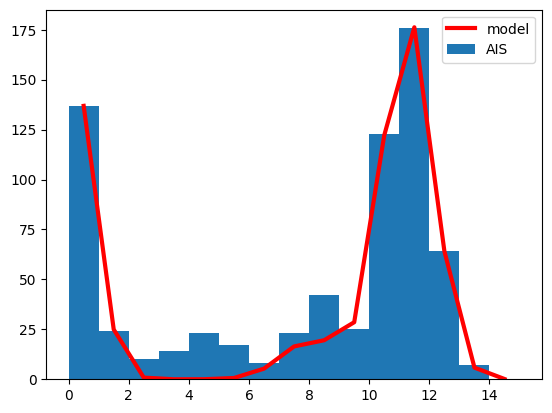

In [87]:
#BI-MODAL
#expected=(0.3, 2, 100, 12, 5, 50)
#params,cov=curve_fit(bimodal,speed_midpts,counts,expected, maxfev=5000000, bounds=(0,[10, 5, 200, 20, 20, 200]) )
#plt.plot(speed_midpts, bimodal(speed_midpts,*params),color='red',lw=3,label='model')

#TRI-MODAL
expected=(0.3, 1, 100, 9, 0.5, 10, 12, 2, 50)
params,cov=curve_fit(trimodal,speed_midpts,counts,expected, maxfev=5000000, bounds=(0,[1, 5, 200, 10, 1, 20, 20, 20, 200 ]))
plt.plot(speed_midpts,trimodal(speed_midpts,*params),color='red',lw=3,label='model')

plt.bar(speed_midpts,counts,width=1*bin_width,label='AIS')
legend()

In [88]:
sigma=sqrt(diag(cov))
print('mu1,sigma1,A1,mu2,sigma2,A2,mu3,sigma3,A3\n',params,'\n',sigma)

mu1,sigma1,A1,mu2,sigma2,A2,mu3,sigma3,A3
 [3.09497660e-09 7.66271254e-01 1.69361312e+02 8.12665684e+00
 1.00000000e+00 2.00000000e+01 1.12708250e+01 8.49282490e-01
 1.82697242e+02] 
 [1.18167364e+01 4.51481940e+00 1.28009192e+03 1.05010218e+00
 1.13861363e+00 1.56152684e+01 1.06415432e-01 1.08596330e-01
 1.65698383e+01]
